In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as se
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df=pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

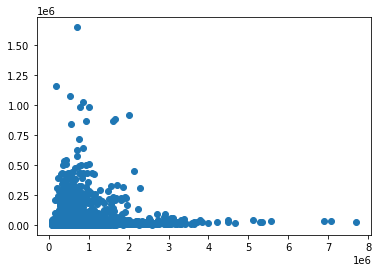

In [ ]:
plt.scatter(df['price'], df['sqft_lot'])

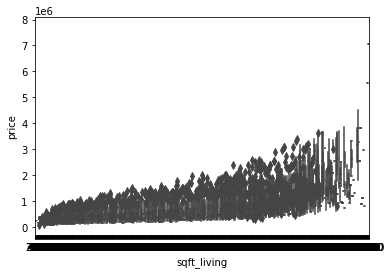

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df,x='sqft_living',y='price')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [ ]:
df.lat.value_counts

<bound method IndexOpsMixin.value_counts of 0        47.5112
1        47.7210
2        47.7379
3        47.5208
4        47.6168
          ...   
21608    47.6993
21609    47.5107
21610    47.5944
21611    47.5345
21612    47.5941
Name: lat, Length: 21613, dtype: float64>

In [ ]:
df.long.value_counts

<bound method IndexOpsMixin.value_counts of 0       -122.257
1       -122.319
2       -122.233
3       -122.393
4       -122.045
          ...   
21608   -122.346
21609   -122.362
21610   -122.299
21611   -122.069
21612   -122.299
Name: long, Length: 21613, dtype: float64>

In [ ]:
column_list=df.columns
df1=list(set(column_list)-set(["id"])-set(["date"])-set(["price"])) #feature selection and droping id date price
x=df[df1].values
y=df["price"].values
y=np.log(y) #Applying logaritm to y i.e. prices of house
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.35,random_state=0)


In [ ]:
lm = LinearRegression()
lm.fit(xtrain, ytrain)
y_predict = lm.predict(xtest)
print(f"Train accuracy {round(lm.score(xtrain,ytrain)*100,2)} %")
print(f"Test accuracy {round(lm.score(xtest,ytest)*100,2)} %")

Train accuracy 76.77 %
Test accuracy 77.46 %


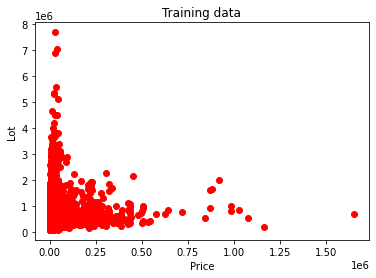

In [ ]:
y=df['price']
x=df['sqft_lot']
plt.scatter(x,y,color='red')
plt.xlabel('Price')
plt.ylabel('Lot')
plt.title('Training data')
plt.show()

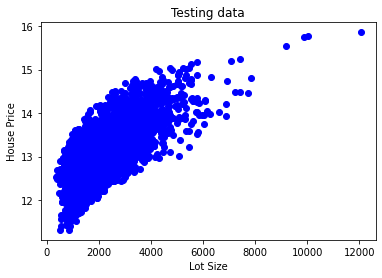

In [ ]:
plt.scatter(xtest[:,5],ytest,color='blue')
plt.xlabel('Lot Size')
plt.ylabel('House Price')
plt.title('Testing data')
plt.show()

In [ ]:
column_list

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df["sqft_lot"]

0         5650
1         7242
2        10000
3         5000
4         8080
         ...  
21608     1131
21609     5813
21610     1350
21611     2388
21612     1076
Name: sqft_lot, Length: 21613, dtype: int64

<function matplotlib.pyplot.plot>

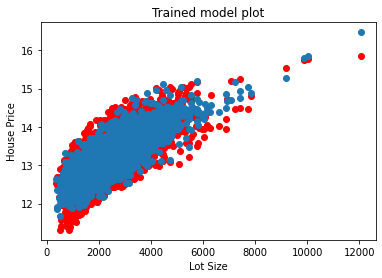

In [ ]:
plt.scatter(xtest[:,5],ytest,color='red')
plt.scatter(xtest[:,5],y_predict)
plt.xlabel("Lot Size")
plt.ylabel("House Price")
plt.title("Trained model plot")
plt.plot

In [ ]:
sqft_size = 5000
value_predict = lm.predict([[sqft_size]])[0]
print(f"Price of house with lot size {sqft_size} will be ${int(value_predict)}")

In [ ]:
lm.coef_

array([ 7.67601004e-02,  1.39953704e+00, -1.61873951e-01, -3.40451754e-03,
       -5.49004218e-04,  9.06059633e-05,  1.55766186e-01,  6.62576738e-07,
       -4.82100956e-07,  5.82237352e-02,  1.07410055e-04, -6.53511492e-03,
        6.27297318e-02,  3.77273393e-05,  3.10062063e-05,  7.10166407e-02,
        4.01817432e-01,  5.28786231e-05])

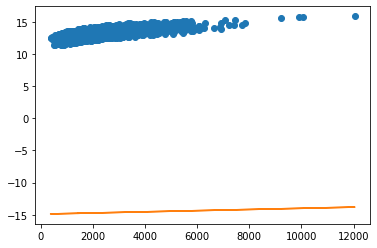

In [ ]:
plt.plot(xtest[:,5], ytest, 'o')
#obtain m (slope) and b(intercept) of linear regression line
#add linear regression line to scatterplot 
plt.plot(xtest[:,5], lm.coef_[5]*xtest[:,5]+lm.intercept_)